# Analyze Geospatial Data in Python: GeoPandas and Shapely

Source: https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/ 

This notebook is the learning note from the article above.

Geospatial data have a lot of value. Our Geospatial series will teach you how to extract this value as a data scientist.

- This 1st article introduces you to the mindset and tools needed to deal with geospatial data. It also includes a reincarnation of what has become known as the first spatial data analysis ever conducted: [John Snow's investigation of the 1854 Broad Street cholera outbreak](https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak).
- The 2nd article will dive deeper into the geospatial python framework by showing you how to conduct your own spatial analysis.
- The 3rd article will apply machine learning to geospatial data.

## Intro to Geospatial Data

Geospatial data describe any object or feature on Earth's surface. Common examples include:

- Where should a brand locate its next store?
- How does the weather impact regional sales?
- What's the best route to take in a car?
- Which area will be hit hardest by a hurricane?
- How does ice cap melting relate to carbon emissions?
- Which areas will be at the highest risk of fires?

Answers to these questions are valuable, making spatial data skills a great addition to any data scientist's toolset.

### The Basics

Let's start by learning to speak the language of geospatial data. At the end of this section, you will know about:

1. Vector vs. raster data
2. Geographic Reference Systems (CRS)
3. The difference between Georeferencing and Geocoding.

#### Vector
Vector data represent geometries in the world. When you open a navigation map, you see vector data. The road network, the buildings, the restaurants, and ATMs are all vectors with their associated attributes.

Note: Vectors are mathematical objects. Unlike rasters, you can zoom into vectors without losing resolution.

There are three main types of vector data:

Points
Lines. Connecting points creates a line.
Polygons. Connecting lines with an enclosed area generate a polygon.

#### Vector

Vector data represent geometries in the world. When you open a navigation map, you see vector data. The road network, the buildings, the restaurants, and ATMs are all vectors with their associated attributes.

*Note*: Vectors are mathematical objects. Unlike rasters, you can zoom into vectors without losing resolution.

There are three main types of vector data:

- Points
- Lines. Connecting points creates a line.
- Polygons. Connecting lines with an enclosed area generate a polygon.

We can use vectors to present features and properties on the Earth’s surface. You'll most often see vectors stored in shapefiles (.shp).

Specific attributes that define properties will generally accompany vectors. For example, properties of a building (e.g., its name, address, price, date built) can accompany a polygon.

#### Raster
Raster data is a grid of pixels. Each pixel within a raster has a value, such as color, height, temperature, wind velocity, or other measurements.

Whereas the default view in Google maps contains vectors, the satellite view contains raster satellite images stitched together. Each pixel in the satellite image has a value/color associated with it. Each pixel in an elevation map represents a specific height. 
`Raster == Image with Pixels`.

These are not your usual images. They contain RGB data that our eyes can see, and multispectral or even hyperspectral information from outside the visible electromagnetic spectrum. Instead of being limited to only 3 channels/colors (RGB), we can get images with many channels.

Things that are invisible to the naked eye, absorbing only a small part of the electromagnetic spectrum, can be revealed in other electromagnetic frequencies.

Raster VS Vector Table

|                 Vector                 |            Raster            |   |
|:--------------------------------------:|:----------------------------:|---|
| Points, Lines, Polygons                | Pixels                       |   |
| Geometric Objects, Infinitely Scalable | Fixed Grid, Fixed Resolution |   |
| .svg, .shp                             | .jpg, .png, .tif             |   |



![](./images/raster_vs_vector.jpg)

#### Coordinate Reference System (CRS)

To identify exact locations on the surface of the Earth, we use a geographic coordinate system.

Even though the Earth is a 3-dimensional sphere, we use a 2-dimensional coordinate system of longitude (vertical lines running north-south) and latitude (horizontal lines running east-west) to identify a position on the Earth's surface. Converting a 3D sphere (the globe) into a 2D coordinate system introduces some distortions. We will explore those distortions in the next section on Map Projections.

*Note: No CRS is perfect
*
Any choice of CRS involves a tradeoff that distorts one or all of the following:

shape
scale/distance
area
Very Important!!! Most mistakes in geospatial analyses come from choosing the wrong CRS for the desired operation. If you do not want to spend days and nights debugging, read this section thoroughly!


![](./images/longitude-and-latitude-simple.width-1200.jpg)

**Note: No CRS is perfect**

Any choice of CRS involves a tradeoff that distorts one or all of the following:

- shape
- scale/distance
- area

**Very Important!!!**

Most mistakes in geospatial analyses come from choosing the wrong CRS for the desired operation. If you do not want to spend days and nights debugging, read this section thoroughly!

Common CRS pitfalls:

Mixing coordinate systems: When combining datasets, the spatial objects MUST have the same reference system. Be sure to convert everything to the same CRS. We show you how to perform this conversion below.

Calculating areas: Use an equal-area CRS before measuring a shape's area.
Calculating distances: Use an equidistant CRS when calculating distances between objects.


#### Map Projections


A map projection flattens a globe's surface by transforming coordinates from the Earth's curved surface into a flat plane.
Because the Earth is not flat (I hope we agree here), any projection of the Earth into a 2D plane is a mere approximation of reality.

In reality, the Earth is a geoid, meaning an irregularly-shaped ball that is not quite a sphere. The most well-known projection is the Mercator projection. As shown in the above gif, the Mercator projection inflates objects that are far from the equator.

These inflations lead to some surprising revelations of our ignorance, like how the USA, China, India, and Europe all fit inside Africa.

### Georeferencing
Georeferencing is the process of assigning coordinates to vectors or rasters to project them on a model of the Earth’s surface. It is what allows us to create layers of maps.

With just a click within Google Maps, you can change seamlessly from satellite view to road network view. Georeferencing makes that switch possible.


#### Geocoding
Geocoding is the process of converting a human-readable address into a set of geographic coordinates.
There several libraries that handle geocoding for you. In Python, `geopandas` has a `geocoding utility` that we'll cover in the following article.

In this notebook, we'll learn about `geopandas` and `shapely`, two of the most useful libraries for geospatial analysis with Python.

- Shapely - a library that allows manipulation and analysis of planar geometry objects.  

- Geopandas - a library that allows you to process shapefiles representing tabular data (like pandas), where every row is associated with a geometry. It provides access to many spatial functions for applying geometries, plotting maps, and geocoding. Geopandas internally uses shapely for defining geometries.

### Shapely

What can you put into geometry?

The basic shapely objects are points, lines, and polygons, but you can also define multiple objects in the same object. Then you have multipoints, multilines and multipolygons. These are useful for objects defined by various geometries, such as countries with islands.

Let's see how that looks:

In [15]:
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

Shapely defines a point by its x, y coordinates, like so:



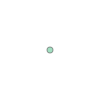

In [16]:
Point(0,0)

We can calculate the distance between shapely objects, such as two points:


In [17]:
a = Point(0, 0)
b = Point(1, 0)
a.distance(b)

1.0

Multiple points can be placed into a single object:



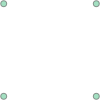

In [18]:
MultiPoint([(0,0), (0,1), (1,1), (1,0)])


A sequence of points form a line object:



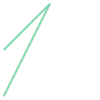

In [19]:
line = LineString([(0,0),(1,2), (0,1)])
line

The length and bounds of a line are available with the length and bounds attributes:



In [20]:
print(f'Length of line {line.length}')
print(f'Bounds of line {line.bounds}')

Length of line 3.6502815398728847
Bounds of line (0.0, 0.0, 1.0, 2.0)


A polygon is also defined by a series of points:



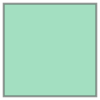

In [21]:
pol = Polygon([(0,0), (0,1), (1,1), (1,0)])
pol

Polygons also have helpful attributes, such as area:



In [22]:
pol.area

1.0

There are other useful functions where geometries interact, such as checking if the polygon `pol` intersects with the `line` from above:

In [23]:
pol.intersects(line)

True

We can also calculate the intersection:

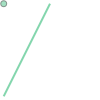

In [24]:
pol.intersection(line)

But what is this object?



In [25]:
print(pol.intersection(line))

GEOMETRYCOLLECTION (POINT (0 1), LINESTRING (0 0, 0.5 1))


It's a `GeometryCollection`, which is a collection of different types of geometries.

Pretty straightforward and intuitive so far! You can do so much more with the shapely library, so be sure to check the [docs](https://shapely.readthedocs.io/en/stable/index.html).

### Geopandas Basics

Another tool for working with geospatial data is geopandas. As we know, pandas DataFrames represent tabular datasets. Similarly, geopandas DataFrames represent tabular data with two extensions:

- The geometry column defines a point, line, or polygon associated with the rest of the columns. This column is a collection of shapely objects. Whatever you can do with shapely objects, you can also do with the geometry object.

- The CRS is the coordinate reference system of the geometry column that tells us where a point, line, or polygon lies on the Earth's surface. Geopandas maps a geometry onto the Earth's surface (e.g., WGS84).

The easiest way to install geopandas on Windows is to use Anaconda with the following command: 
```bash
conda install -c conda-forge geopandas
```

In [26]:
import matplotlib
import geopandas as gpd

#### Loading dataset

Let's start by loading a dataset shipped with geopandas, called 'naturalearth_lowres'. This dataset includes the geometry of each country in the world, accompanied by some further details such as Population and GDP estimates.

In [27]:
world_gdf = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
world_gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


#### CRS
The dataframe also includes a CRS that maps the polygons defined in the geometry column to the Earth's surface.

In [28]:
world_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In our case, the CRS is EPSG:4326. 

That CRS uses Latitude and Longitude in degrees as coordinates.

**Note - Components of a CRS**

- Datum - The reference system, which in our case defines the starting point of measurement (Prime Meridian) and the model of the shape of the Earth (Ellipsoid). The most common Datum is WGS84, but it is not the only one.

- Area of use - In our case, the are of use is the whole world, but there are many CRS that are optimized for a particular area of interest.

- Axes and Units - Usually, longitude and latitude are measured in degrees. Units for x, y coordinates are often measured in meters.

Let's see an application for which we have to change the CRS.

Let's measure the population density of each country! We can measure the area of each geometry but bear in mind that we need first convert to an equal-area projection that uses meters as units.

In [29]:
world_gdf = world_gdf.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
world_gdf.crs

<Projected CRS: +proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +un ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can now calculate each country's population density by dividing the population estimate by the area.

Note: We can access the area of the geometries as we would regular columns. Although no column contains geometry areas, the area is an attribute of the geometry objects.?

In [30]:
world_gdf['pop_density'] = world_gdf.pop_est / world_gdf.area * 10**6

world_gdf.sort_values(by='pop_density', ascending=False)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop_density
99,157826578,Asia,Bangladesh,BGD,628400.00,"POLYGON ((8455037.031 2862141.705, 8469605.972...",1174.967806
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((3127401.561 4023733.541, 3087561.638...",899.418534
140,23508428,Asia,Taiwan,TWN,1127000.00,"POLYGON ((11034560.069 3156825.603, 11032285.2...",681.899108
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((3141154.397 4236334.349, 3117804.289...",615.543551
96,51181299,Asia,South Korea,KOR,1929000.00,"POLYGON ((10835604.955 4755864.739, 10836040.9...",515.848728
...,...,...,...,...,...,...,...
97,3068243,Asia,Mongolia,MNG,37000.00,"POLYGON ((7032142.671 6000941.853, 7107939.605...",1.987486
20,2931,South America,Falkland Is.,FLK,281.80,"POLYGON ((-4814015.486 -6253920.632, -4740858....",0.179343
22,57713,North America,Greenland,GRL,2173.00,"POLYGON ((-2555525.099 8347965.820, -2346518.8...",0.026295
23,140,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.00,"POLYGON ((5550199.759 -5932855.132, 5589906.67...",0.012091


Notice how the geometry objects now have values that are in totally different units than before.

Just looking at the dataframe above, we can quickly identify the outliers. Bangladesh has a population density of around 1174 persons/km2. Antarctica has a near-zero population density, with only 810 people living in a vast space.

It's always better to visualize maps, though. So let's visualize!



#### Visualization

We can call `.plot()` on `world_gdf` just like a pandas dataframe:

<AxesSubplot:>

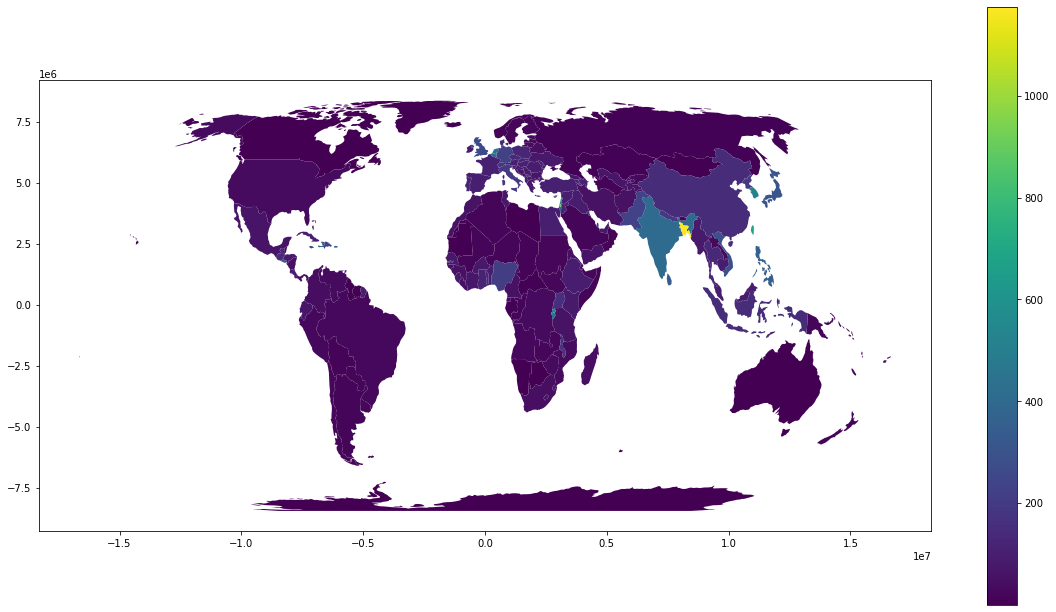

In [31]:
figsize = (20, 11)
world_gdf.plot('pop_density', legend=True, figsize=figsize)

The above map doesn't look very helpful, so let's make it better by doing the following:
1. Change to the Mercator projection since it's more familiar.
2. Convert the colorbar to a logscale.

We can pass different arguments to the plot function as you would directly on matplotlib.


<AxesSubplot:>

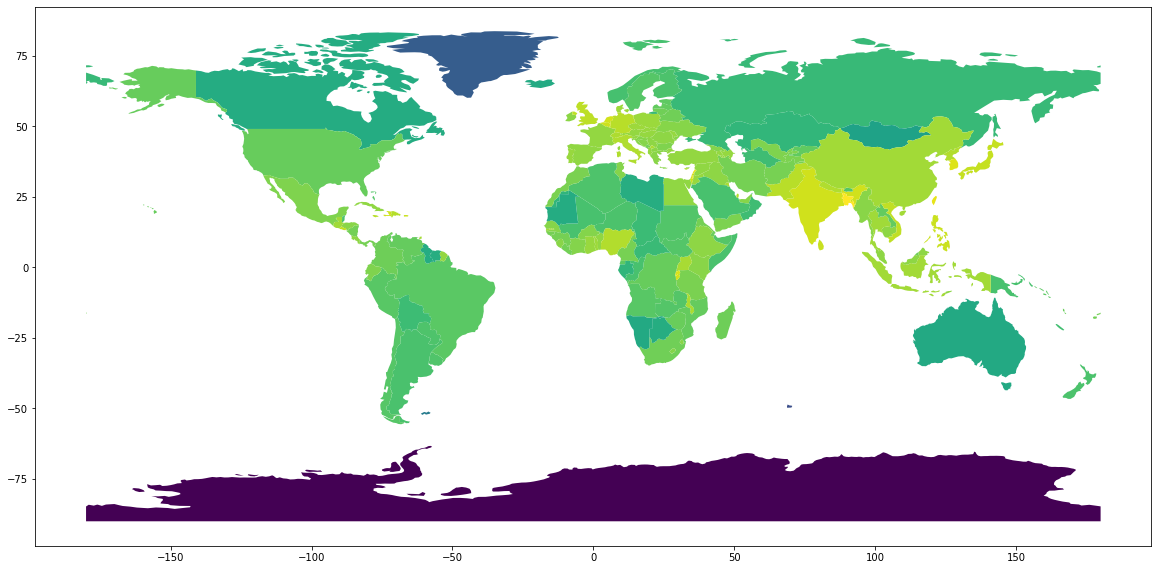

In [43]:
norm_color = matplotlib.colors.LogNorm(vmin=world_gdf.pop_density.min(), vmax=world_gdf.pop_density.max(), clip=True)

world_gdf.to_crs('epsg:4326').plot("pop_density", 
                                   figsize=figsize, 
                                   legend=False, norm=norm_color)


Up until now, we've gone over the basics of shapely and geopandas, but now it's time we move to a complete case study.

**End**

norm_color